<a href="https://colab.research.google.com/github/ikemnkur/CS_5013/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance # uncomment these to install missing packages if they are not already installed
!pip install pandas

In [2]:
import yfinance as yf
import pandas as pd
# from google.colab import files
# uploaded = files.upload()  # This will prompt you to select a file


# I tried imported the data from the csv
# import io
# import pandas as pd
# df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

def get_price(tick,start='2022-10-01',end=None):
    return yf.Ticker(tick).history(start=start,end=end)['Close']

def get_prices(tickers,start='2022-10-01',end=None):
    df=pd.DataFrame()
    for s in tickers:
        df[s]=get_price(s,start,end)
    return df

# Prepare training and testing data sets

In [3]:
feature_stocks=['tsla','meta','goog','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock='msft'

# training set
start_date_train='2023-1-01'
end_date_train='2024-6-30'

X_train=get_prices(feature_stocks,start=start_date_train,end=end_date_train)
y_train=get_prices([predict_stock],start=start_date_train,end=end_date_train)

# testing set
start_date_test='2024-11-01'
end_date_test='2024-12-31'
X_test=get_prices(feature_stocks,start=start_date_test,end=end_date_test)
y_test=get_prices([predict_stock],start=start_date_test,end=end_date_test)

In [ ]:
X_train

,tsla,meta,goog,amzn,nflx,gbtc,gdx,intc,dal,c
Date,,,,,,,,,,
2023-01-03 00:00:00-05:00,108.099998,124.265312,89.378853,85.820000,294.950012,8.200000,28.842234,25.775145,32.105247,41.898052
2023-01-04 00:00:00-05:00,113.639999,126.885307,88.392395,85.139999,309.410004,8.380000,30.067492,26.691210,33.857697,42.977997
2023-01-05 00:00:00-05:00,110.339996,126.456940,86.459335,83.120003,309.700012,8.450000,29.804935,26.575495,34.684692,42.785809
2023-01-06 00:00:00-05:00,113.059998,129.525223,87.844376,86.080002,315.549988,8.650000,30.689848,27.703697,35.472309,43.298317
2023-01-09 00:00:00-05:00,119.769997,128.977310,88.482086,87.360001,315.170013,9.650000,30.398119,28.262983,36.200855,43.508820
...,...,...,...,...,...,...,...,...,...,...
2024-06-24 00:00:00-04:00,182.580002,498.032776,180.347717,185.570007,669.020020,52.610001,33.852570,30.377298,49.083549,59.807236
2024-06-25 00:00:00-04:00,187.350006,509.702240,185.126007,186.339996,672.409973,55.020000,33.447327,30.546227,48.497330,60.041241
2024-06-26 00:00:00-04:00,196.369995,512.217773,184.916504,193.610001,677.690002,54.130001,33.427559,30.347488,47.871361,59.719482


In [ ]:
y_train

,msft
Date,
2023-01-03 00:00:00-05:00,235.711716
2023-01-04 00:00:00-05:00,225.400909
2023-01-05 00:00:00-05:00,218.720535
2023-01-06 00:00:00-05:00,221.298233
2023-01-09 00:00:00-05:00,223.452881
...,...
2024-06-24 00:00:00-04:00,445.971924
2024-06-25 00:00:00-04:00,449.239441
2024-06-26 00:00:00-04:00,450.444855


# Convert training and testing data into numpy array

In [4]:
import numpy as np

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)


# Use linear regression to predict msft stock price from the other stocks' prices

## 1. Append a dummy feature to both X_train and X_test

In [5]:
# Your solution here
# For the training set:
dummy_train = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, dummy_train))

# For the testing set:
dummy_test = np.ones((X_test.shape[0], 1))
X_test = np.hstack((X_test, dummy_test))


## 2. Find the best linear regression model based on your training data ($w=(X X')^{-1} X y$)
### Note that you may need to transpose the matrices to make things work



In [8]:
# Your solution here
# Compute the weights (w) from the training data
w = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

# Use the computed model to make predictions on the training set
y_pred_train = X_train @ w # This line is added to calculate predictions for the training set

print("Computed weights (w):")
print(w)

# Use the computed model to make predictions on the testing set
y_pred_test = X_test @ w

# Optionally, display the predicted values for the test set
print("Predicted values for test set:")
print(y_pred_test)

Computed weights (w):
[[ 0.17572693]
 [ 0.26121   ]
 [ 0.34563864]
 [ 0.30010642]
 [ 0.19741551]
 [-0.48462162]
 [ 2.3339598 ]
 [ 0.69007921]
 [-1.89771739]
 [ 0.50179841]
 [16.52947575]]
Predicted values for test set:
[[478.52601865]
 [477.14455995]
 [482.97262459]
 [487.47052856]
 [505.4998037 ]
 [505.17363827]
 [496.78421981]
 [492.9608254 ]
 [493.13055033]
 [488.72335324]
 [477.12020728]
 [491.19583149]
 [498.92690695]
 [501.32657715]
 [499.50548958]
 [499.91671075]
 [492.51861179]
 [499.8950091 ]
 [497.22320965]
 [503.72041381]
 [514.06504787]
 [522.85761167]
 [523.18917286]
 [521.93811188]
 [535.09031394]
 [537.09023279]
 [542.3888173 ]
 [558.72401593]
 [554.3697318 ]
 [548.98802992]
 [558.62742621]
 [558.19120542]
 [533.88496779]
 [534.41307276]
 [532.43106258]
 [540.65417429]
 [550.58912847]
 [547.61892079]
 [539.25121967]
 [531.25843108]]


## 3. Report your training and testing error
### How far your prediction from the actual price. Compute the mean square error for both training and testing

In [11]:
# Your solution here
mse_train = np.mean((y_train - y_pred_train) ** 2)
mse_test = np.mean((y_test - y_pred_test) ** 2)

print("Training Mean Squared Error:", mse_train)
print("Testing Mean Squared Error:", mse_test)

Training Mean Squared Error: 79.90549207772757
Testing Mean Squared Error: 7940.009713127295


**Question 2#**

StockPredictor(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=20, bias=True)
  (fc5): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch 1/10, Train Loss: 120578.1650, Val Loss: 177058.8547
Epoch 2/10, Train Loss: 119339.2381, Val Loss: 175905.1788
Epoch 3/10, Train Loss: 118926.9645, Val Loss: 175566.7471
Epoch 4/10, Train Loss: 118803.5429, Val Loss: 175475.8619
Epoch 5/10, Train Loss: 118770.8155, Val Loss: 175449.6119
Epoch 6/10, Train Loss: 118762.4416, Val Loss: 175442.9197
Epoch 7/10, Train Loss: 118760.3890, Val Loss: 175441.2453
Epoch 8/10, Train Loss: 118759.8812, Val Loss: 175440.8310
Epoch 9/10, Train Loss: 118759.7559, Val Loss: 175440.7217
Epoch 10/10, Train Loss: 118759.6971, Val Loss: 175440.6043


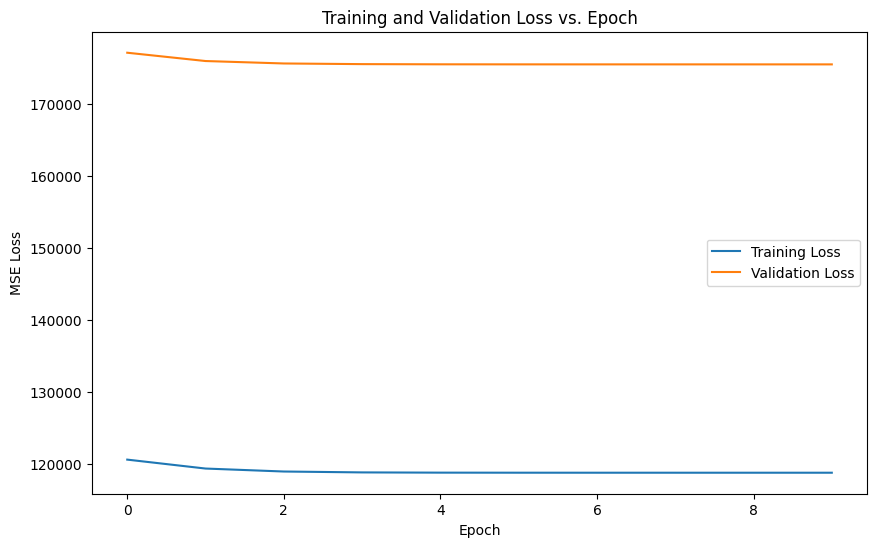

Total number of parameters: 1921
Test MSE Loss: 178238.665625


In [46]:
import yfinance as yf
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

# Functions to download stock data
def get_price(tick, start='2022-10-01', end=None):
    return yf.Ticker(tick).history(start=start, end=end)['Close']

def get_prices(tickers, start='2022-10-01', end=None):
    df = pd.DataFrame()
    for s in tickers:
        df[s] = get_price(s, start, end)
    return df

# Part A

# Define the tickers
feature_stocks = ['tsla','meta','goog','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock = 'msft'

# Training data: 2023-01-01 to 2024-06-30
start_date_train = '2023-01-01'
end_date_train   = '2024-06-30'
X_train_df = get_prices(feature_stocks, start=start_date_train, end=end_date_train)
y_train_df = get_prices([predict_stock], start=start_date_train, end=end_date_train)

# Validation data: 2024-07-01 to 2024-10-31
start_date_val = '2024-07-01'
end_date_val   = '2024-10-31'
X_val_df = get_prices(feature_stocks, start=start_date_val, end=end_date_val)
y_val_df = get_prices([predict_stock], start=start_date_val, end=end_date_val)

# Test data: 2024-11-01 to 2024-12-31
start_date_test = '2024-11-01'
end_date_test   = '2024-12-31'
X_test_df = get_prices(feature_stocks, start=start_date_test, end=end_date_test)
y_test_df = get_prices([predict_stock], start=start_date_test, end=end_date_test)

# Convert DataFrames to numpy arrays
X_train = np.array(X_train_df)
y_train = np.array(y_train_df)
X_val   = np.array(X_val_df)
y_val   = np.array(y_val_df)
X_test  = np.array(X_test_df)
y_test  = np.array(y_test_df)

# Convert to PyTorch tensors (ensure they are float)
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val   = torch.from_numpy(X_val).float()
y_val   = torch.from_numpy(y_val).float()
X_test  = torch.from_numpy(X_test).float()
y_test  = torch.from_numpy(y_test).float()

# Create DataLoader objects for batching
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val, y_val)
test_dataset  = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size)
test_loader  = DataLoader(test_dataset, batch_size=batch_size)

#Part B
import torch.nn as nn

class StockPredictor(nn.Module):
    def __init__(self, input_dim):
        super(StockPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.out = nn.Linear(20, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.out(x)
        return x

# Instantiate the model;
# input_dim = 10; which is the lenght of the feature_stocks obj
input_dim = len(feature_stocks)
model = StockPredictor(input_dim)
print(model)

import matplotlib.pyplot as plt

# Loss function
criterion = nn.MSELoss()

# Part C

# Choosing an optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # This configuration for the optimizer gives the best result
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Not used
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # Akward results


# Part D
# Option: Define a learning rate scheduler

num_epochs = 10

# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=num_epochs)
# Results: Epoch 10/10, Train Loss: 367.6678, Val Loss: 4322.0335

scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.01, step_size_up=200)
# Results: Epoch 10/10, Train Loss: 281.4499, Val Loss: 2917.3344
# this gave the best results

# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
# Epoch 10/10, Train Loss: 118759.6971, Val Loss: 175440.6043
# This one gave me very bad results, so I will not use it as I dont want to spend time optimizing it instead I will use
# the CyclicLR Optimizer

# Training

# Training loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        # For using OneCycle and Cyclic LRs
        scheduler.step()  # update learning rate if using a per-batch scheduler

        # For using ReduceLROnPlateau
        # scheduler.step(epoch_val_loss)

        running_train_loss += loss.item() * X_batch.size(0)
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_val_loss += loss.item() * X_batch.size(0)
    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

# Plot training and validation loss vs. epoch
plt.figure(figsize=(10,6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.show()

total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters:", total_params)

model.eval()
running_test_loss = 0.0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        running_test_loss += loss.item() * X_batch.size(0)
test_loss = running_test_loss / len(test_loader.dataset)
print("Test MSE Loss:", test_loss)


### Exta Credit Attempt

Training with adam optimizer and learning rate 0.001
Epoch 1/10: Train Loss = 120483.3461, Val Loss = 176293.9985
Epoch 2/10: Train Loss = 102874.7106, Val Loss = 35956.9250
Epoch 3/10: Train Loss = 14160.5817, Val Loss = 669.0026
Epoch 4/10: Train Loss = 2526.7570, Val Loss = 1530.4354
Epoch 5/10: Train Loss = 629.2841, Val Loss = 1557.0422
Epoch 6/10: Train Loss = 353.3809, Val Loss = 971.0026
Epoch 7/10: Train Loss = 266.9583, Val Loss = 1419.1438
Epoch 8/10: Train Loss = 254.0045, Val Loss = 1501.9641
Epoch 9/10: Train Loss = 250.0915, Val Loss = 1659.6043
Epoch 10/10: Train Loss = 249.4756, Val Loss = 1638.6211
Validation Loss: 669.0026
Training with adam optimizer and learning rate 0.005
Epoch 1/10: Train Loss = 116297.3772, Val Loss = 111895.4010
Epoch 2/10: Train Loss = 30360.6385, Val Loss = 462.2709
Epoch 3/10: Train Loss = 6588.0246, Val Loss = 1887.2653
Epoch 4/10: Train Loss = 1514.1377, Val Loss = 1068.3260
Epoch 5/10: Train Loss = 623.2028, Val Loss = 2482.6643
Epoch 6/1

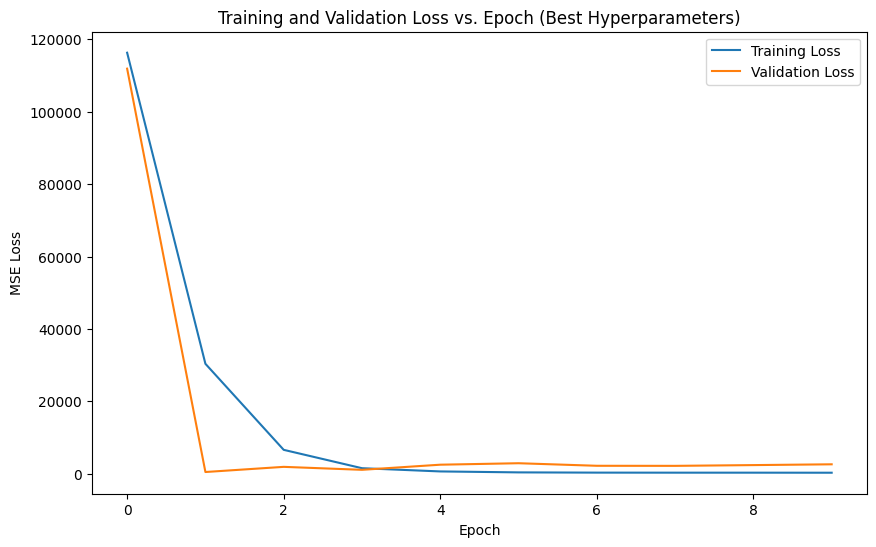

Total number of parameters: 1921
Test MSE Loss: 180607.240625


In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
from torch.utils.data import TensorDataset, DataLoader
import copy
import matplotlib.pyplot as plt


# Functions to download stock data
def get_price(tick, start='2022-10-01', end=None):
    return yf.Ticker(tick).history(start=start, end=end)['Close']

def get_prices(tickers, start='2022-10-01', end=None):
    df = pd.DataFrame()
    for s in tickers:
        df[s] = get_price(s, start, end)
    return df

# Define the tickers
feature_stocks = ['tsla','meta','goog','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock = 'msft'

# Training data: 2023-01-01 to 2024-06-30
start_date_train = '2023-01-01'
end_date_train   = '2024-06-30'
X_train_df = get_prices(feature_stocks, start=start_date_train, end=end_date_train)
y_train_df = get_prices([predict_stock], start=start_date_train, end=end_date_train)

# Validation data: 2024-07-01 to 2024-10-31
start_date_val = '2024-07-01'
end_date_val   = '2024-10-31'
X_val_df = get_prices(feature_stocks, start=start_date_val, end=end_date_val)
y_val_df = get_prices([predict_stock], start=start_date_val, end=end_date_val)

# Test data: 2024-11-01 to 2024-12-31
start_date_test = '2024-11-01'
end_date_test   = '2024-12-31'
X_test_df = get_prices(feature_stocks, start=start_date_test, end=end_date_test)
y_test_df = get_prices([predict_stock], start=start_date_test, end=end_date_test)

# Convert DataFrames to numpy arrays
X_train = np.array(X_train_df)
y_train = np.array(y_train_df)
X_val   = np.array(X_val_df)
y_val   = np.array(y_val_df)
X_test  = np.array(X_test_df)
y_test  = np.array(y_test_df)

# Convert to PyTorch tensors (float)
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val   = torch.from_numpy(X_val).float()
y_val   = torch.from_numpy(y_val).float()
X_test  = torch.from_numpy(X_test).float()
y_test  = torch.from_numpy(y_test).float()

# Create DataLoader objects for batching
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val, y_val)
test_dataset  = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size)
test_loader  = DataLoader(test_dataset, batch_size=batch_size)


# Define your model architecture
class StockPredictor(nn.Module):
    def __init__(self, input_dim):
        super(StockPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.out = nn.Linear(20, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.out(x)
        return x

# A function to train the model and return the final validation loss
def train_model(model, train_loader, val_loader, optimizer, scheduler, num_epochs=25):
    criterion = nn.MSELoss()
    best_val_loss = float('inf')

    # Lists to store losses for each epoch
    train_losses = []
    val_losses = []

    # Initialize best_model_state to None to ensure it has a value
    best_model_state = copy.deepcopy(model.state_dict())

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            # For the OneCycle LR scheduler, for each step per batch:
            if scheduler is not None:
                scheduler.step()
            running_train_loss += loss.item() * X_batch.size(0)
        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                running_val_loss += loss.item() * X_batch.size(0)
        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)

        # Save best model
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            best_model_state = copy.deepcopy(model.state_dict())

        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {epoch_train_loss:.4f}, Val Loss = {epoch_val_loss:.4f}")

    # Load best model state before returning
    model.load_state_dict(best_model_state)
    return best_val_loss, train_losses, val_losses

# Hyper-Parameter Tuning Process

# Set up the Grid Search parameters
optimizers_to_try = ['adam', 'sgd', 'sgd+momentum']   # I set three types of optimizers to try
learning_rates_to_try = [0.001, 0.005, 0.01]          # 3 Different learning rates
num_epochs = 10

# For logging the best hyperparameters
best_val_loss = float('inf')
best_hyperparams = None
best_model_overall = None

# Iterate over all hyperparameter combinations
for opt_name in optimizers_to_try:
    for lr in learning_rates_to_try:
        # Reinitialize the model for each new hyperparameter configuration
        model = StockPredictor(input_dim=len(feature_stocks))

        # Selecting a optimizer based on current hyperparameters
        if opt_name == 'adam':
            optimizer = torch.optim.Adam(model.parameters(), lr=lr) # this config gives better results
        elif opt_name == 'sgd':
            optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        elif opt_name == 'sgd+momentum':
            optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9) # Not used Bad?


        # Setting up a learning rate scheduler
        scheduler = OneCycleLR(optimizer, max_lr=lr*10, steps_per_epoch=len(train_loader), epochs=num_epochs)
        # Setting up a LR schduler for SGD since it appear that OneCycleLR is too aggressive
        if opt_name == 'sgd' or opt_name == 'sgd+momentum':
            scheduler = OneCycleLR(optimizer, max_lr=lr*2, steps_per_epoch=len(train_loader), epochs=num_epochs) # failed
        else:
            scheduler = OneCycleLR(optimizer, max_lr=lr*10, steps_per_epoch=len(train_loader), epochs=num_epochs) # this still is not working


        print(f"Training with {opt_name} optimizer and learning rate {lr}")
        val_loss, train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, scheduler, num_epochs)
        print(f"Validation Loss: {val_loss:.4f}")

        # Update best hyperparameters if current configuration is better
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_hyperparams = (opt_name, lr)
            best_model_overall = copy.deepcopy(model)
            best_train_losses = train_losses[:]  # Save a copy of the loss history
            best_val_losses = val_losses[:]

print("\nBest Hyperparameters:")
print(f"Optimizer: {best_hyperparams[0]}, Learning Rate: {best_hyperparams[1]}")
print(f"Best Validation Loss: {best_val_loss:.4f}")

# Verify that the loss lists are not empty
print("Number of epochs recorded:", len(best_train_losses))
print("Train losses:", best_train_losses)
print("Validation losses:", best_val_losses)

# Plot training and validation loss vs. epoch for the best configuration
plt.figure(figsize=(10,6))
plt.plot(best_train_losses, label='Training Loss')
plt.plot(best_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss vs. Epoch (Best Hyperparameters)')
plt.legend()
plt.show()

total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters:", total_params)

model.eval()
running_test_loss = 0.0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        running_test_loss += loss.item() * X_batch.size(0)
test_loss = running_test_loss / len(test_loader.dataset)
print("Test MSE Loss:", test_loss)
